# [1주차]_심화과제_MNIST_예측_모델에_deep_learning_techniques_적용하기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt


def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [3]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10( # dataset을 CIFAR10으로 변경
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 170M/170M [00:03<00:00, 44.1MB/s]


In [4]:
print(len(trainset))
print(trainset[0][0].shape, trainset[0][1]) # CIFAR10의 shape 확인

50000
torch.Size([3, 32, 32]) 6


In [5]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [6]:
from torch import nn


class Model1(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU() # Activation 함수를 `nn.ReLU`에서 `nn.LeakyReLU`로 변경

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [7]:
# optimizer SGD로 시도
from torch.optim import SGD, Adam

lr = 0.001

model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

n_epochs = 50
loss_fn = nn.CrossEntropyLoss()

train_sgd = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sgd.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 451.16529393196106
Epoch   2 | Loss: 450.66032814979553
Epoch   3 | Loss: 450.2171423435211
Epoch   4 | Loss: 449.7861976623535
Epoch   5 | Loss: 449.37306904792786
Epoch   6 | Loss: 448.96684098243713
Epoch   7 | Loss: 448.5678791999817
Epoch   8 | Loss: 448.17002749443054
Epoch   9 | Loss: 447.7711718082428
Epoch  10 | Loss: 447.3304076194763
Epoch  11 | Loss: 446.8447389602661
Epoch  12 | Loss: 446.3554513454437
Epoch  13 | Loss: 445.8690855503082
Epoch  14 | Loss: 445.38442945480347
Epoch  15 | Loss: 444.8774473667145
Epoch  16 | Loss: 444.378280878067
Epoch  17 | Loss: 443.86891889572144
Epoch  18 | Loss: 443.33335161209106
Epoch  19 | Loss: 442.8024172782898
Epoch  20 | Loss: 442.31041383743286
Epoch  21 | Loss: 441.78740191459656
Epoch  22 | Loss: 441.23618721961975
Epoch  23 | Loss: 440.68158435821533
Epoch  24 | Loss: 440.15813875198364
Epoch  25 | Loss: 439.6091754436493
Epoch  26 | Loss: 439.0606880187988
Epoch  27 | Loss: 438.5078203678131
Epoch  28 | Loss

In [8]:
# optimizer Adam으로 시도
model = Model1(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_adam = []
test_adam = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_adam.append(accuracy(model, trainloader))
  test_adam.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 431.7863224744797
Epoch   2 | Loss: 389.99160850048065
Epoch   3 | Loss: 370.22982573509216
Epoch   4 | Loss: 355.73386204242706
Epoch   5 | Loss: 342.3149001598358
Epoch   6 | Loss: 333.975977063179
Epoch   7 | Loss: 325.98765087127686
Epoch   8 | Loss: 318.34183371067047
Epoch   9 | Loss: 313.61369729042053
Epoch  10 | Loss: 306.79106640815735
Epoch  11 | Loss: 301.91481506824493
Epoch  12 | Loss: 296.007212638855
Epoch  13 | Loss: 294.0862897634506
Epoch  14 | Loss: 287.2461824417114
Epoch  15 | Loss: 283.45970010757446
Epoch  16 | Loss: 279.1364115476608
Epoch  17 | Loss: 276.70909309387207
Epoch  18 | Loss: 271.7638478279114
Epoch  19 | Loss: 270.0204436779022
Epoch  20 | Loss: 263.781733751297
Epoch  21 | Loss: 259.98688995838165
Epoch  22 | Loss: 259.8239195346832
Epoch  23 | Loss: 254.80926382541656
Epoch  24 | Loss: 250.1661696434021
Epoch  25 | Loss: 250.7866461277008
Epoch  26 | Loss: 244.24474394321442
Epoch  27 | Loss: 245.18894982337952
Epoch  28 | Loss:

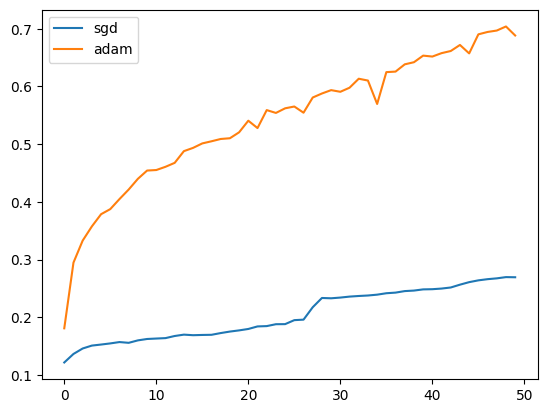

In [9]:
plot_acc(train_sgd, train_adam, 'sgd', 'adam') # 시각화로 비교. adam이 더 정확도가 높음

In [10]:
class Model2(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid() # Activation 함수를 Sigmoid로 변경

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [11]:
model = Model2(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_sigmoid = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_sigmoid.append(accuracy(model, trainloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 410.7064172029495
Epoch   2 | Loss: 392.6366926431656
Epoch   3 | Loss: 386.38366317749023
Epoch   4 | Loss: 384.18527030944824
Epoch   5 | Loss: 381.10466039180756
Epoch   6 | Loss: 379.29200088977814
Epoch   7 | Loss: 377.3080224990845
Epoch   8 | Loss: 375.8725663423538
Epoch   9 | Loss: 374.57520401477814
Epoch  10 | Loss: 373.4094730615616
Epoch  11 | Loss: 372.1556046009064
Epoch  12 | Loss: 371.554390668869
Epoch  13 | Loss: 370.3854501247406
Epoch  14 | Loss: 370.2460513114929
Epoch  15 | Loss: 368.16781270504
Epoch  16 | Loss: 368.2111027240753
Epoch  17 | Loss: 367.2056632041931
Epoch  18 | Loss: 366.061044216156
Epoch  19 | Loss: 365.16178023815155
Epoch  20 | Loss: 364.18500900268555
Epoch  21 | Loss: 363.74890899658203
Epoch  22 | Loss: 363.9175411462784
Epoch  23 | Loss: 362.8839681148529
Epoch  24 | Loss: 362.37208104133606
Epoch  25 | Loss: 361.31492483615875
Epoch  26 | Loss: 361.4096145629883
Epoch  27 | Loss: 360.70065426826477
Epoch  28 | Loss: 360

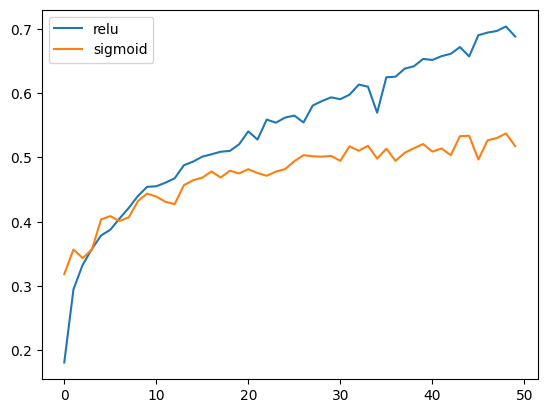

In [12]:
plot_acc(train_adam, train_sigmoid, 'relu', 'sigmoid') # 시각화. relu가 더 잘됨

In [13]:
# Dropout

class Model3(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()
    self.dropout = nn.Dropout(p=0.1) # dropout 추가

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.dropout(self.act(self.layer1(x)))
    x = self.dropout(self.act(self.layer2(x)))
    x = self.dropout(self.act(self.layer3(x)))

    return x

In [14]:
model = Model3(32 * 32 * 3, 1024)
model = model.to('cuda')

optimizer = Adam(model.parameters(), lr=lr)

train_dropout = []
test_dropout = []

for epoch in range(n_epochs):
  total_loss = 0.
  model.train()
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  with torch.no_grad():
    model.eval()
    train_dropout.append(accuracy(model, trainloader))
    test_dropout.append(accuracy(model, testloader))

  print(f"Epoch {epoch + 1:3d} | Loss: {total_loss}")

Epoch   1 | Loss: 443.87301445007324
Epoch   2 | Loss: 417.5818190574646
Epoch   3 | Loss: 408.15256571769714
Epoch   4 | Loss: 395.8892432451248
Epoch   5 | Loss: 391.72925221920013
Epoch   6 | Loss: 384.8757475614548
Epoch   7 | Loss: 381.9365773200989
Epoch   8 | Loss: 378.45908999443054
Epoch   9 | Loss: 373.1426668167114
Epoch  10 | Loss: 370.80331444740295
Epoch  11 | Loss: 366.37876641750336
Epoch  12 | Loss: 363.02128505706787
Epoch  13 | Loss: 360.98017513751984
Epoch  14 | Loss: 357.79074692726135
Epoch  15 | Loss: 355.26946663856506
Epoch  16 | Loss: 354.9398082494736
Epoch  17 | Loss: 351.59520494937897
Epoch  18 | Loss: 350.3925734758377
Epoch  19 | Loss: 346.1833931207657
Epoch  20 | Loss: 346.54360127449036
Epoch  21 | Loss: 345.11834836006165
Epoch  22 | Loss: 343.3246775865555
Epoch  23 | Loss: 340.56767225265503
Epoch  24 | Loss: 339.0274969339371
Epoch  25 | Loss: 338.7857576608658
Epoch  26 | Loss: 336.02698731422424
Epoch  27 | Loss: 333.8712638616562
Epoch  28 | L

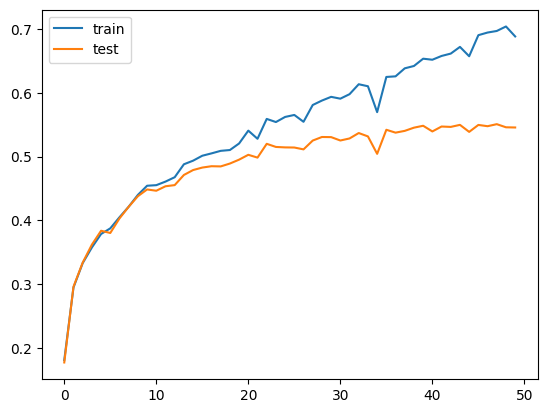

In [15]:
plot_acc(train_adam, test_adam)

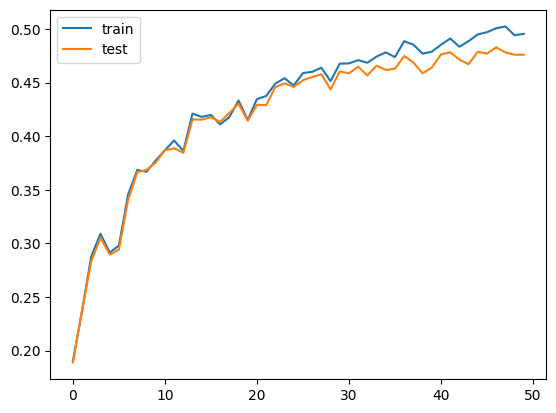

In [16]:
plot_acc(train_dropout, test_dropout)

# 결과
## Optimizer
- SGD < Adam

## Activation 함수
- LeakyReLU > Sigmoid

## Dropout
- dropout 적용 < 미적용 -> 왜 미적용이 더 정확도가 높은가요?